In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [485]:
evds=evdsAPI('dsIC3fiGlu')


In [486]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4601,21-09-2023,27.0396
4602,22-09-2023,27.0507
4603,25-09-2023,27.1528
4604,26-09-2023,27.2240


In [487]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [488]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


In [489]:
inflation=enf
inflation=pd.DataFrame(inflation)
inflation.columns=["Tarih","TÜFE"]


In [490]:

inflationagt=pd.DataFrame.from_dict({'Tarih':"2023-9",'TÜFE': [1717]})
inflation=pd.concat([inflation,inflationagt],axis=0)
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


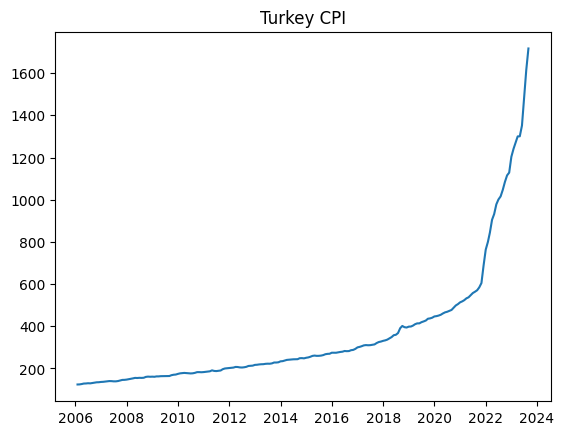

In [491]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [492]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [493]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)

df6["Onceki USD/TL"]=df6["USD/TL"].shift(1)
df6.iloc[0,1]=1.32
df6

,USD/TL,Onceki USD/TL
2006-02-01,1.326535,1.320000
2006-03-01,1.335139,1.326535
2006-04-01,1.337345,1.335139
2006-05-01,1.420659,1.337345
2006-06-01,1.600536,1.420659
...,...,...
2023-05-01,19.719514,19.337032
2023-06-01,23.106042,19.719514
2023-07-01,26.470338,23.106042
2023-08-01,26.999127,26.470338


In [494]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [495]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [496]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame(money_supply)
del dfn["Tarih"]
dfn["Para Arzi Onceki"]=dfn["Para Arzi"].shift(1)
dfn.iloc[0,1]=2.39
dfn


,Para Arzi,Para Arzi Onceki
2006-02-01,2.423895,2.390000
2006-03-01,2.494857,2.423895
2006-04-01,2.521919,2.494857
2006-05-01,2.751947,2.521919
2006-06-01,2.791388,2.751947
...,...,...
2023-05-01,94.093167,95.059993
2023-06-01,108.345324,94.093167
2023-07-01,114.784753,108.345324
2023-08-01,120.253199,114.784753


In [497]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4594,12-09-2023,93.58
4595,13-09-2023,93.04
4596,14-09-2023,95.20
4597,15-09-2023,95.55


In [498]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [499]:

brent1=pd.DataFrame(brent)
brent1.columns=["Brent"]
brent1


,Brent
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [500]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\Bora\AppData\Local\Temp\ipykernel_8928\3566834801.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-01,60.210000
2006-03-01,62.064783
2006-04-01,70.260000
2006-05-01,69.776957
2006-06-01,68.555909
...,...
2023-05-01,75.466000
2023-06-01,74.839091
2023-07-01,80.108095


In [501]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [502]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952
210,2023-8,99.238055


In [503]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

C:\Users\Bora\AppData\Local\Temp\ipykernel_8928\2513009782.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
TIME,
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-05-01,88.043441
2023-06-01,95.646045
2023-07-01,98.468952


In [504]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.iloc[:59,1]=5
pfaiz.iloc[210,1]=25
pfaiz.iloc[211,1]=30
pfaiz


,Tarih,TP_APIFON4
0,2006-2,5.00
1,2006-3,5.00
2,2006-4,5.00
3,2006-5,5.00
4,2006-6,5.00
...,...,...
207,2023-5,9.09
208,2023-6,12.84
209,2023-7,17.50
210,2023-8,25.00


In [505]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

C:\Users\Bora\AppData\Local\Temp\ipykernel_8928\3293406371.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Politika Faizi
TIME,
2006-02-01,5.00
2006-03-01,5.00
2006-04-01,5.00
2006-05-01,5.00
2006-06-01,5.00
...,...
2023-05-01,9.09
2023-06-01,12.84
2023-07-01,17.50


In [506]:
X=pd.concat([df6["Onceki USD/TL"],dfn["Para Arzi Onceki"],df14.Brent,df3.Kredi,pfaiz["Politika Faizi"]],axis=1)



In [507]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y


,CPI
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.20
2006-06-01,128.63
...,...
2023-05-01,1300.60
2023-06-01,1351.59
2023-07-01,1479.84
2023-08-01,1614.31


In [508]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [509]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9761.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          3.20e-178
Time:                        19:13:53   Log-Likelihood:                -618.44
No. Observations:                 148   AIC:                             1249.
Df Residuals:                     142   BIC:                             1267.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               84.4634      5.398  

In [510]:
results.params

const               84.463441
Onceki USD/TL        4.380039
Para Arzi Onceki    10.949298
Brent                0.211169
Kredi                1.250011
Politika Faizi       0.657386
dtype: float64

In [511]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
train_data = df6['USD/TL'][:len(df6)-12]
test_data = df6['USD/TL'][len(df6)-12:]


ar_model = AutoReg(train_data, lags=12)
ar_fit = ar_model.fit()
ar_forecast = ar_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
print(np.sqrt(mean_squared_error(test_data, ar_forecast)))





1.6365861201639205


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [512]:
# AR modeli ile tüm veri seti üzerinde eğitim
full_ar_model = AutoReg(df6['USD/TL'], lags=12)
full_ar_fit = full_ar_model.fit()

# Önümüzdeki 12 ay için tahmin yapma
full_ar_forecast = full_ar_fit.predict(start=len(df6), end=len(df6)+11)

usdtahmin=pd.DataFrame({26.94},index=["2023-09-01"])
usdtahmin=pd.concat([usdtahmin,full_ar_forecast],axis=0)
usdtahmin.columns=["USD Tahmin"]
usdtahmin

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,USD Tahmin
2023-09-01,26.940000
2023-10-01 00:00:00,27.628988
2023-11-01 00:00:00,28.733901
2023-12-01 00:00:00,30.401457
2024-01-01 00:00:00,31.806062
2024-02-01 00:00:00,32.995505
2024-03-01 00:00:00,34.020974
2024-04-01 00:00:00,34.581517
2024-05-01 00:00:00,34.932483
2024-06-01 00:00:00,35.788108


In [513]:
# Modeli eğitim verisi üzerinde eğitme
model = ARIMA(df14["Brent"], order=(4,1,2))
# Modeli tekrar eğitim verisi üzerinde eğitme
model_fit = model.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=12)
predictions = forecast.values
predictions = pd.DataFrame(predictions,index=pd.date_range('2023-09-01', periods=12, freq='M'))
brenttahmin=pd.DataFrame({92.64},index=["2023-09-01"])
brenttahmin=pd.concat([brenttahmin,predictions],axis=0)
brenttahmin.columns=["Brent Tahmin"]
brenttahmin

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppDa

,Brent Tahmin
2023-09-01,92.640000
2023-09-30 00:00:00,92.216241
2023-10-31 00:00:00,90.095339
2023-11-30 00:00:00,92.440792
2023-12-31 00:00:00,94.285316
2024-01-31 00:00:00,91.671425
2024-02-29 00:00:00,90.710831
2024-03-31 00:00:00,93.521213
2024-04-30 00:00:00,93.644451
2024-05-31 00:00:00,90.910444


In [514]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(pfaiz, order=(4,1,1))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-09-01', periods=12, freq='M'))
faiztahmin=pd.DataFrame({30},index=["2023-09-01"])
faiztahmin=pd.concat([faiztahmin,optimal_future_predictions],axis=0)
faiztahmin.columns=["Faiz Tahmin"]
faiztahmin


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Faiz Tahmin
2023-09-01,30.000000
2023-09-30 00:00:00,34.242444
2023-10-31 00:00:00,37.940222
2023-11-30 00:00:00,40.274728
2023-12-31 00:00:00,41.548637
2024-01-31 00:00:00,41.827881
2024-02-29 00:00:00,41.088629
2024-03-31 00:00:00,39.505066
2024-04-30 00:00:00,37.230032
2024-05-31 00:00:00,34.419782


In [515]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(dfn["Para Arzi Onceki"], order=(4,3,4))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-09-01', periods=12, freq='M'))
paraarzitahmin=pd.DataFrame({120.25},index=["2023-09-01"])
paraarzitahmin=pd.concat([paraarzitahmin,optimal_future_predictions],axis=0)
paraarzitahmin.columns=["Para Arzı Tahmin"]
paraarzitahmin


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Para Arzı Tahmin
2023-09-01,120.250000
2023-09-30 00:00:00,126.835360
2023-10-31 00:00:00,133.666626
2023-11-30 00:00:00,136.996354
2023-12-31 00:00:00,146.528597
2024-01-31 00:00:00,149.748230
2024-02-29 00:00:00,158.734451
2024-03-31 00:00:00,164.223670
2024-04-30 00:00:00,172.422555
2024-05-31 00:00:00,179.063276


In [516]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(df3["Kredi"], order=(2,1,2))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_predictions = pd.DataFrame(optimal_future_predictions,index=pd.date_range('2023-09-01', periods=12, freq='M'))
kreditahmin=pd.DataFrame({100.79},index=["2023-09-01"])
kreditahmin=pd.concat([kreditahmin,optimal_future_predictions],axis=0)
kreditahmin.columns=["Kredi Tahmin"]
kreditahmin



c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Kredi Tahmin
2023-09-01,100.790000
2023-09-30 00:00:00,103.097404
2023-10-31 00:00:00,105.860374
2023-11-30 00:00:00,108.396322
2023-12-31 00:00:00,111.020043
2024-01-31 00:00:00,113.588155
2024-02-29 00:00:00,116.166058
2024-03-31 00:00:00,118.724015
2024-04-30 00:00:00,121.275641
2024-05-31 00:00:00,123.814795


In [517]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()










res2=[]



for i in range(12):
    res2.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin["USD Tahmin"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin["Para Arzı Tahmin"][i]+results.params["Kredi"]*kreditahmin["Kredi Tahmin"][i]+results.params["Brent"]*brenttahmin["Brent Tahmin"][i]+results.params["Politika Faizi"]*faiztahmin["Faiz Tahmin"][i])
   
    



df9=pd.DataFrame()
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
df9["Inflation"]=res2
df9['TIME']=dates
df9=df9.set_index(dates)
del df9['TIME']
df9

,Inflation
2023-09-01,1684.387659
2023-10-01,1765.094239
2023-11-01,1850.168118
2023-12-01,1899.130183
2024-01-01,2014.160409
2024-02-01,2057.464705
2024-03-01,2162.882697
2024-04-01,2228.190922
2024-05-01,2321.220222
2024-06-01,2398.428337


In [576]:

data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=212, freq='M')

# Veriyi bir veri çerçevesine yerleştirme


data["Döviz Kuru"]=df6["Onceki USD/TL"]
data["Para Arzı"]=dfn["Para Arzi"]
data["Petrol"]=df14["Brent"]
data["Kredi Hacmi"]=df3["Kredi"]
data["TÜFE"]=df["CPI"]
data.set_index(dates, inplace=True)
data.dropna(inplace=True)
data=data.head(211)
data





,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,TÜFE
2006-02-28,1.320000,2.423895,60.210000,1.381847,123.84
2006-03-31,1.326535,2.494857,62.064783,1.481222,124.18
2006-04-30,1.335139,2.521919,70.260000,1.527510,125.84
2006-05-31,1.337345,2.751947,69.776957,1.664881,128.20
2006-06-30,1.420659,2.791388,68.555909,1.740395,128.63
...,...,...,...,...,...
2023-04-30,19.003478,95.059993,84.739474,85.721139,1300.04
2023-05-31,19.337032,94.093167,75.466000,88.043441,1300.60
2023-06-30,19.719514,108.345324,74.839091,95.646045,1351.59
2023-07-31,23.106042,114.784753,80.108095,98.468952,1479.84


In [605]:
import numpy as np
import pandas as pd
import statsmodels.api as sm





model = sm.tsa.VAR(data)

# Modeli uyarlayın
results = model.fit(ic="aic")  # İhtiyaca göre maksimum gecikme düzeyini ayarlayabilirsiniz





# Tahminler yapın (örneğin, 12 aylık öngörü)
forecast_horizon = 12
forecast = results.forecast(y=results.endog, steps=forecast_horizon)

forecast=pd.DataFrame(forecast[:,4])
forecast.columns=["TÜFE"]
forecast


,TÜFE
0,1711.809355
1,1782.073484
2,1817.439232
3,1909.568785
4,2089.494278
5,2227.499658
6,2338.365890
7,2327.485307
8,2366.214621
9,2547.756916


In [607]:
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin5=pd.DataFrame(forecast["TÜFE"])
tahmin5=tahmin5.set_index(dates)
tahmin5.columns=["TÜFE"]
tahmin5

,TÜFE
2023-09-01,1711.809355
2023-10-01,1782.073484
2023-11-01,1817.439232
2023-12-01,1909.568785
2024-01-01,2089.494278
2024-02-01,2227.499658
2024-03-01,2338.365890
2024-04-01,2327.485307
2024-05-01,2366.214621
2024-06-01,2547.756916


In [621]:
data["random_walk_component"] = data['Döviz Kuru'].shift(1)
data=data.dropna()
data

,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,TÜFE,random_walk_component
2006-03-31,1.326535,2.494857,62.064783,1.481222,124.18,1.320000
2006-04-30,1.335139,2.521919,70.260000,1.527510,125.84,1.326535
2006-05-31,1.337345,2.751947,69.776957,1.664881,128.20,1.335139
2006-06-30,1.420659,2.791388,68.555909,1.740395,128.63,1.337345
2006-07-31,1.600536,2.711670,73.674286,1.731811,129.72,1.420659
...,...,...,...,...,...,...
2023-04-30,19.003478,95.059993,84.739474,85.721139,1300.04,18.857210
2023-05-31,19.337032,94.093167,75.466000,88.043441,1300.60,19.003478
2023-06-30,19.719514,108.345324,74.839091,95.646045,1351.59,19.337032
2023-07-31,23.106042,114.784753,80.108095,98.468952,1479.84,19.719514


In [632]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa



# Parametrelerin zaman içinde değişeceği random walk süreçlerini oluşturun
param_dolar = np.cumsum(np.random.randn(210))  # Dolar parametresi için


# Hata teriminin zaman içinde değişeceği süreci oluşturun (2 lag)
error_term = np.random.randn(210)
for t in range(2, 210):
    error_term[t] += 0.7 * error_term[t - 1] + 0.2 * error_term[t - 2]

# Hata teriminin dağılımı için t-dağılımı kullanın (serbestlik derecesi tahmin ediliyor)
degrees_of_freedom = np.abs(np.random.randn(210)) * 10 + 2  # Rastgele serbestlik derecesi

# Stokastik volatiliteyi oluşturun (varyans da zaman içinde random walk)
volatility = np.exp(np.cumsum(np.random.randn(210)))  # Logaritmik volatiliteyi oluşturun

# Tüm bu oluşturulan süreçleri bir DataFrame'e ekleyin
data['Param_Dolar'] = param_dolar
data['Error_Term'] = error_term
data['Degrees_of_Freedom'] = degrees_of_freedom
data['Volatility'] = volatility

model_data = data
model = tsa.VAR(model_data)

# Modeli uyarlayın (4 lag)
results = model.fit(ic="aic",maxlags=1)

# Tahminleri yapın (örneğin, son 12 aylık öngörü)
forecast_horizon = 12
forecast_input = model_data.iloc[-4:, :].values  # Son 4 gözlemi kullanarak tahmin ediyoruz
forecast = results.forecast(y=forecast_input, steps=forecast_horizon)

forecast=pd.DataFrame(forecast[:,4])

forecast.columns=["TÜFE"]
forecast

C:\Users\Bora\AppData\Local\Temp\ipykernel_8928\3608096570.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Param_Dolar'] = param_dolar
C:\Users\Bora\AppData\Local\Temp\ipykernel_8928\3608096570.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Error_Term'] = error_term
C:\Users\Bora\AppData\Local\Temp\ipykernel_8928\3608096570.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,TÜFE
0,1711.341187
1,1789.298545
2,1856.959769
3,1923.221516
4,1994.513266
5,2074.162162
6,2162.944968
7,2260.114912
8,2364.389459
9,2474.635748


In [633]:
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin6=pd.DataFrame(forecast["TÜFE"])
tahmin6=tahmin6.set_index(dates)
tahmin6.columns=["TÜFE"]
tahmin6

,TÜFE
2023-09-01,1711.341187
2023-10-01,1789.298545
2023-11-01,1856.959769
2023-12-01,1923.221516
2024-01-01,1994.513266
2024-02-01,2074.162162
2024-03-01,2162.944968
2024-04-01,2260.114912
2024-05-01,2364.389459
2024-06-01,2474.635748


In [616]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as sm
data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=212, freq='M')

# Veriyi bir veri çerçevesine yerleştirme


data["Döviz Kuru"]=df6["Onceki USD/TL"]
data["Para Arzı"]=dfn["Para Arzi"]
data["Petrol"]=df14["Brent"]
data["Kredi Hacmi"]=df3["Kredi"]
data["TÜFE"]=df["CPI"]
data.set_index(dates, inplace=True)
data.dropna(inplace=True)
data=data.head(211)
data

model = sm.VECM(data, k_ar_diff=1, coint_rank=5, deterministic="co",seasons=12)
results = model.fit()

# TÜFE'nin gelecekteki değerlerini tahmin et
tahmin = results.predict(steps=12, alpha=0.05)

tahmin1=pd.DataFrame(tahmin[0],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE'])


tahmin2=pd.DataFrame(tahmin[1],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE'])
tahmin3=pd.DataFrame(tahmin[2],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE'])

tahmin4=pd.DataFrame()
tahmin4["TÜFE"]=(tahmin1["TÜFE"]+tahmin2["TÜFE"]+tahmin3["TÜFE"])/3
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin4=tahmin4.set_index(dates)
tahmin4

,TÜFE
2023-09-01,1704.489868
2023-10-01,1764.810515
2023-11-01,1817.148693
2023-12-01,1879.038570
2024-01-01,1960.745936
2024-02-01,2050.537672
2024-03-01,2152.299225
2024-04-01,2264.352915
2024-05-01,2378.048358
2024-06-01,2500.108724


In [634]:
dff=pd.concat([df["CPI"].head(211),df9["Inflation"]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]



dfas4=pd.concat([df["CPI"].head(211),tahmin4["TÜFE"]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=["CPI"]

dfas5=pd.concat([df["CPI"].head(211),tahmin5["TÜFE"]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=["CPI"]




dfas6=pd.concat([df["CPI"].head(211),tahmin6["TÜFE"]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=["CPI"]
dfas6







,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2024-04-01,2260.114912
2024-05-01,2364.389459
2024-06-01,2474.635748
2024-07-01,2590.199228


In [635]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
dfas4['onceki_yil_tufe'] = dfas4['CPI'].shift(12)
dfas5['onceki_yil_tufe'] = dfas5['CPI'].shift(12)
dfas6['onceki_yil_tufe'] = dfas6['CPI'].shift(12)


# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
dfas4['yillik_enflasyon_orani'] = ((dfas4['CPI'] / dfas4['onceki_yil_tufe']) - 1) * 100
dfas5['yillik_enflasyon_orani'] = ((dfas5['CPI'] / dfas5['onceki_yil_tufe']) - 1) * 100
dfas6['yillik_enflasyon_orani'] = ((dfas6['CPI'] / dfas6['onceki_yil_tufe']) - 1) * 100
# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)
dfas4.dropna(inplace=True)
dfas5.dropna(inplace=True)
dfas6.dropna(inplace=True)




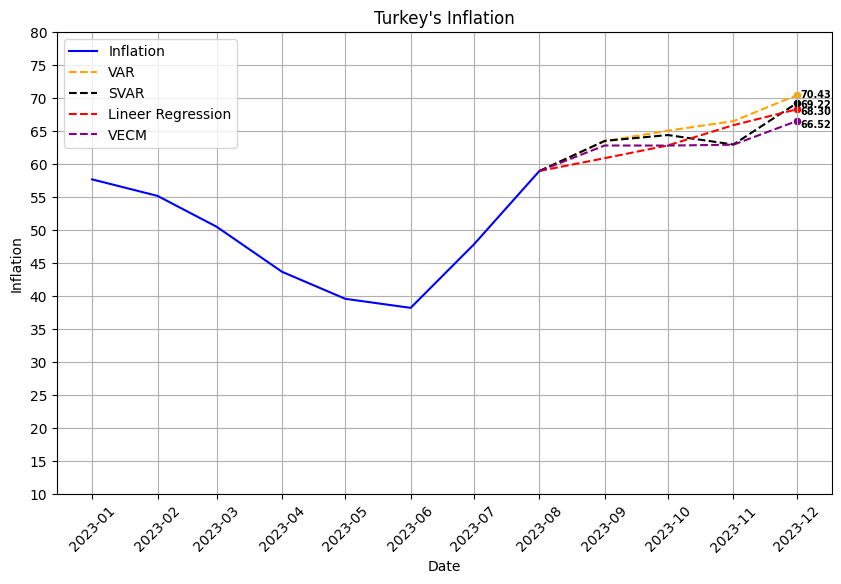

In [638]:
dates=pd.date_range('2008-02-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)






# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:199]["yillik_enflasyon_orani"], label='Inflation', color='blue')
#plt.plot(dfas2.iloc[198:203]["yillik_enflasyon_orani"],'--', label='Forecast with monetary tightening', color='green')
plt.plot(dfas6.iloc[198:203]["yillik_enflasyon_orani"],'--',label='VAR', color='orange'    )
plt.plot(dfas5.iloc[198:203]["yillik_enflasyon_orani"],'--',label='SVAR', color='black')
plt.plot(dff.iloc[198:203]["yillik_enflasyon_orani"],'--',label='Lineer Regression', color='red')
plt.plot(dfas4.iloc[198:203]["yillik_enflasyon_orani"],'--',label='VECM', color='purple')



plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:212].index, dff.iloc[191:212].index.strftime('%Y-%m'), rotation=45)
y_max = int(max(dff["yillik_enflasyon_orani"].iloc[191:212]))
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri3=dfas4["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri4=dfas5["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri5=dfas6["yillik_enflasyon_orani"].iloc[202:203]


# Y ekseni etiketlerini ayarlama
for i, v in enumerate(son_dort_veri):
    plt.annotate(f'{v:.2f}', (son_dort_veri.index[i], v), xytext=(3, -4), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri.index,son_dort_veri,color='red',s=20)


for i, v in enumerate(son_dort_veri3):
    plt.annotate(f'{v:.2f}', (son_dort_veri3.index[i], v), xytext=(3, -5), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri3.index,son_dort_veri3,color='purple',s=20)

for i,v in enumerate(son_dort_veri4):
    plt.annotate(f'{v:.2f}', (son_dort_veri4.index[i], v), xytext=(3, -3), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri4.index,son_dort_veri4,color='black',s=20)


for i,v in enumerate(son_dort_veri5):
    plt.annotate(f'{v:.2f}', (son_dort_veri5.index[i], v), xytext=(3, -2), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri5.index,son_dort_veri5,color='orange',s=20)

#for i,v in enumerate(son_dort_veri6):
 #   plt.annotate(f'{v:.2f}', (son_dort_veri5.index[i], v), xytext=(3, -4), textcoords='offset points', fontsize=7,
  #               color='black', fontweight='bold')
   # plt.scatter(son_dort_veri6.index,son_dort_veri6,color='green',s=20)






# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()


In [668]:
lineer_regression=(((dff.loc['2023-09-01']["CPI"]/dff.loc['2023-08-01']["CPI"])-1)*100)
var=(((dfas6.loc['2023-09-01']["CPI"]/dfas6.loc['2023-08-01']["CPI"])-1)*100)
svar=(((dfas5.loc['2023-09-01']["CPI"]/dfas5.loc['2023-08-01']["CPI"])-1)*100)
vecm=(((dfas4.loc['2023-09-01']["CPI"]/dfas4.loc['2023-08-01']["CPI"])-1)*100)
ortalama=(lineer_regression+var+svar+vecm)/4
median=np.median([lineer_regression,var,svar,vecm])






In [669]:
lineer_regression_yillik=(((dff.loc['2023-09-01']["CPI"]/dff.loc['2022-09-01']["CPI"])-1)*100)
var_yillik=(((dfas6.loc['2023-09-01']["CPI"]/dfas6.loc['2022-09-01']["CPI"])-1)*100)
svar_yillik=(((dfas5.loc['2023-09-01']["CPI"]/dfas5.loc['2022-09-01']["CPI"])-1)*100)
vecm_yillik=(((dfas4.loc['2023-09-01']["CPI"]/dfas4.loc['2022-09-01']["CPI"])-1)*100)
ortalama_yillik=(lineer_regression_yillik+var_yillik+svar_yillik+vecm_yillik)/4
median_yillik=np.median([lineer_regression_yillik,var_yillik,svar_yillik,vecm_yillik])


In [670]:
tahminler=pd.DataFrame({"Eylül 2023":[lineer_regression,var,svar,vecm,ortalama,median],"Yıllık":[lineer_regression_yillik,var_yillik,svar_yillik,vecm_yillik,ortalama_yillik,median_yillik]},index=["Lineer Regression","VAR","SVAR","VECM","Ortalama","Medyan"])
tahminler



,Eylül 2023,Yıllık
Lineer Regression,4.341029,60.894426
VAR,6.010691,63.469055
SVAR,6.039692,63.513775
VECM,5.586279,62.814610
Ortalama,5.494423,62.672966
Medyan,5.798485,63.141832
